# Arewa Data Science Academy
## Deep Learning Cohort2.0
## Name: Umar Lawan Sani
### Email: umarfarouq447@gmail.com
### Title: Week 4 Solution
### Exercises Solution

In [1]:
# Check for GPU
!nvidia-smi

Thu Feb 27 16:53:49 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   57C    P8             14W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code


2.5.1+cu124


## 1. What are 3 areas in industry where computer vision is currently being used?

## Healthcare
## Transportation
## Retail & E-Commerce

In [3]:
# Healthcare
# Transportation
# Retail & E-Commerce

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

Overfitting in machine learning occurs when a model learns not only the underlying patterns in the training data but also the noise and outliers, leading to poor performance on unseen data.

In [4]:
# Overfitting in machine learning occurs when a model learns not only the underlying patterns in the training data but also the noise and outliers, leading to poor performance on unseen data.

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each.
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

## Regularization
## Increase Number of Hidden Layers
## Cross-Validation

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [5]:
import torch
import torchvision
import torchvision.transforms as transforms

# Define transformations (convert images to tensors and normalize)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load the MNIST train and test datasets
train_dataset = torchvision.datasets.MNIST(root="./data", train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root="./data", train=False, transform=transform, download=True)

# Print dataset sizes
print(f"Train dataset size: {len(train_dataset)}")
print(f"Test dataset size: {len(test_dataset)}")


Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:02<00:00, 4.58MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 134kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:01<00:00, 1.08MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 6.70MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Train dataset size: 60000
Test dataset size: 10000


## 6. Visualize at least 5 different samples of the MNIST training dataset.

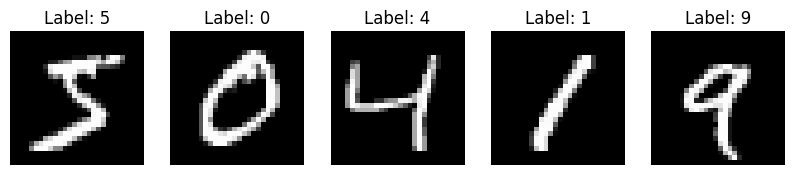

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Select 5 random samples from the dataset
fig, axes = plt.subplots(1, 5, figsize=(10, 2))
for i in range(5):
    image, label = train_dataset[i]  # Get image and label
    image = image.squeeze().numpy()  # Convert to NumPy array and remove extra dimensions

    axes[i].imshow(image, cmap="gray")  # Display the image
    axes[i].set_title(f"Label: {label}")
    axes[i].axis("off")

plt.show()


## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [7]:
from torch.utils.data import DataLoader

# Set batch size
batch_size = 32

# Create DataLoaders for train and test datasets
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Print the number of batches
print(f"Number of training batches: {len(train_loader)}")
print(f"Number of testing batches: {len(test_loader)}")


Number of training batches: 1875
Number of testing batches: 313


## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [8]:
import torch.nn as nn
import torch.nn.functional as F

# Define the TinyVGG model (model_2)
class TinyVGG(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.conv_block1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)  # Downsampling
        )
        self.conv_block2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)  # Downsampling
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(hidden_units * 7 * 7, output_shape)  # Output 10 classes for MNIST
        )

    def forward(self, x):
        x = self.conv_block1(x)
        x = self.conv_block2(x)
        x = self.classifier(x)
        return x

# Instantiate the model for MNIST (1 input channel, 10 output classes)
model_2 = TinyVGG(input_shape=1, hidden_units=64, output_shape=10)

# Print model summary
print(model_2)


TinyVGG(
  (conv_block1): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block2): Sequential(
    (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=3136, out_features=10, bias=True)
  )
)


## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [9]:
import torch
import time

# Set device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

# Move model to the selected device
model_2 = model_2.to(device)

# Define loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_2.parameters(), lr=0.001)

# Training function
def train_model(model, dataloader, loss_fn, optimizer, device, epochs=5):
    model.train()  # Set to training mode
    start_time = time.time()

    for epoch in range(epochs):
        epoch_loss = 0
        correct = 0
        total = 0

        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)

            # Forward pass
            outputs = model(images)
            loss = loss_fn(outputs, labels)

            # Backward pass
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Compute loss & accuracy
            epoch_loss += loss.item()
            correct += (outputs.argmax(1) == labels).sum().item()
            total += labels.size(0)

        print(f"Epoch {epoch+1}/{epochs} - Loss: {epoch_loss/len(dataloader):.4f} - Accuracy: {correct/total:.4f}")

    end_time = time.time()
    print(f"Training completed in {end_time - start_time:.2f} seconds.\n")



In [ ]:

print("Training on CPU...")
model_2.to("cpu")  # Move model to CPU
train_model(model_2, train_loader, loss_fn, optimizer, "cpu", epochs=5)


Training on CPU...


In [ ]:
if torch.cuda.is_available():
    print("Training on GPU...")
    model_2.to("cuda")  # Move model to GPU
    train_model(model_2, train_loader, loss_fn, optimizer, "cuda", epochs=5)
else:
    print("GPU not available, skipping GPU training.")


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Function to make predictions and visualize results
def visualize_predictions(model, dataloader, device, num_samples=5):
    model.eval()  # Set to evaluation mode
    fig, axes = plt.subplots(1, num_samples, figsize=(10, 2))

    # Get a batch of images and labels
    images, labels = next(iter(dataloader))
    images, labels = images[:num_samples].to(device), labels[:num_samples].to(device)

    # Make predictions
    with torch.no_grad():
        outputs = model(images)
        predictions = outputs.argmax(1)  # Get predicted class

    # Visualize the images along with predictions
    for i in range(num_samples):
        image = images[i].cpu().squeeze().numpy()  # Convert tensor to NumPy
        axes[i].imshow(image, cmap="gray")
        axes[i].set_title(f"Pred: {predictions[i].item()}\nLabel: {labels[i].item()}")
        axes[i].axis("off")

    plt.show()

# Move model to the correct device (CPU/GPU)
device = "cuda" if torch.cuda.is_available() else "cpu"
model_2.to(device)

# Visualize predictions
visualize_predictions(model_2, test_loader, device)


## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Function to make predictions and generate a confusion matrix
def plot_confusion_matrix(model, dataloader, device):
    model.eval()  # Set model to evaluation mode
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)

            # Make predictions
            outputs = model(images)
            preds = outputs.argmax(1)  # Get predicted class

            # Store predictions and labels
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Compute confusion matrix
    cm = confusion_matrix(all_labels, all_preds)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix for MNIST Predictions")
    plt.show()

# Move model to device
device = "cuda" if torch.cuda.is_available() else "cpu"
model_2.to(device)

# Plot confusion matrix
plot_confusion_matrix(model_2, test_loader, device)


## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

In [ ]:
import torch
import torch.nn as nn

# Create a random tensor of shape [1, 3, 64, 64] (batch_size=1, channels=3, height=64, width=64)
random_tensor = torch.rand(1, 3, 64, 64)

# Function to apply Conv2d with different kernel sizes and print output shape
def test_conv2d(kernel_size):
    conv_layer = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=kernel_size, stride=1, padding=0)
    output = conv_layer(random_tensor)
    print(f"Kernel Size: {kernel_size} -> Output Shape: {output.shape}")

# Test different kernel sizes
for k in [1, 3, 5, 7, 9]:
    test_conv2d(k)


## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset.
* Then plot some predictions where the model was wrong alongside what the label of the image should've been.
* After visualing these predictions do you think it's more of a modelling error or a data error?
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?

In [ ]:
import torchvision
import torchvision.transforms as transforms

# Define transformations (convert images to tensors and normalize)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load FashionMNIST train and test datasets
fashion_train_dataset = torchvision.datasets.FashionMNIST(root="./data", train=True, transform=transform, download=True)
fashion_test_dataset = torchvision.datasets.FashionMNIST(root="./data", train=False, transform=transform, download=True)

# Create DataLoaders
batch_size = 32
fashion_test_loader = torch.utils.data.DataLoader(fashion_test_dataset, batch_size=batch_size, shuffle=False)

# FashionMNIST class labels
fashion_classes = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
                   "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


In [ ]:
# Move model to device
device = "cuda" if torch.cuda.is_available() else "cpu"
model_2.to(device)
model_2.eval()  # Set model to evaluation mode

# Get predictions on test set
incorrect_samples = []

with torch.no_grad():
    for images, labels in fashion_test_loader:
        images, labels = images.to(device), labels.to(device)

        # Make predictions
        outputs = model_2(images)
        preds = outputs.argmax(1)  # Get predicted class

        # Store incorrect predictions
        for i in range(len(labels)):
            if preds[i] != labels[i]:  # If prediction is incorrect
                incorrect_samples.append((images[i], preds[i], labels[i]))

        # Stop once we collect 5 incorrect samples
        if len(incorrect_samples) >= 5:
            break


In [ ]:
import matplotlib.pyplot as plt

# Plot 5 incorrect predictions
fig, axes = plt.subplots(1, 5, figsize=(10, 2))

for i in range(5):
    image, pred_label, true_label = incorrect_samples[i]
    image = image.cpu().squeeze().numpy()  # Convert tensor to NumPy

    axes[i].imshow(image, cmap="gray")
    axes[i].set_title(f"Pred: {fashion_classes[pred_label.item()]}\nTrue: {fashion_classes[true_label.item()]}")
    axes[i].axis("off")

plt.show()
